<a href="https://colab.research.google.com/github/Vanshika1002/Cleo-Royale/blob/main/cleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded =files.upload()

Saving Analytics-BA Virtual Case Study - Sales v1 (Cleo Royale).xlsx to Analytics-BA Virtual Case Study - Sales v1 (Cleo Royale).xlsx


In [ ]:
!pip install pandas matplotlib openpyxl

# **DATA CLEANING**

In [ ]:
import pandas as pd

file = "Analytics-BA Virtual Case Study - Sales v1 (Cleo Royale).xlsx"

# Load sheets with correct header row (row 6 -> index 5)
sales = pd.read_excel(file, sheet_name="Sales Data", header=6)
stores = pd.read_excel(file, sheet_name="Store Mapping", header=6)

# Rename columns
sales = sales.rename(columns={
    "Order_ID": "order_id",
    "Customer_Email": "customer_id",
    "Sales_Date": "order_date",
    "Store_ID": "store_id",
    "Product_Name": "product",
    "Qty": "units",
    "Payment_Mode": "payment_mode",
    "Sales_Amt": "amount"
})

stores = stores.rename(columns={
    "Store_ID": "store_id",
    "Store_Name": "store_name",
    "Store_City": "city",
    "Store_Zip": "zip",
    "Store_State": "state"
})

# Convert datatypes
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")
sales["units"] = pd.to_numeric(sales["units"], errors="coerce")
sales["amount"] = pd.to_numeric(sales["amount"].astype(str).str.replace("$",""), errors="coerce")

print("✅ Data cleaned successfully!")
print(sales.head())
#to show missing values
print(sales.isna().sum())
print(stores.isna().sum())

#invalid zip code not 5 digit sort of
invalid_zip = stores[stores["zip"].astype(str).str.len() != 5]
print("Invalid ZIP codes:\n", invalid_zip)


print("Orders with non-positive units:\n", sales[sales["units"] <= 0])
print("Orders with non-positive amount:\n", sales[sales["amount"] <= 0])



✅ Data cleaned successfully!
   Unnamed: 0 order_id               customer_id                 order_date  \
0         NaN   #27022  aaden_baca73@hotmail.com  2021-01-13 18:02:56-08:00   
1         NaN   #22055  aaden_baca73@hotmail.com  2021-12-31 08:51:14-08:00   
2         NaN   #21135  aaden_baca73@hotmail.com  2022-03-01 17:31:21-08:00   
3         NaN    #5016  aaden_baca73@hotmail.com  2022-03-28 20:33:02-07:00   
4         NaN   #30193  aaden-kirk64@outlook.com  2022-07-12 17:09:59-07:00   

   store_id                      product  units       payment_mode  amount  
0  AC_18019  Moisture Boost Facial Cream      4  Credit Card Swipe   180.0  
1  MF_16597       Revitalizing Eye Cream      2  Credit Card Swipe   170.0  
2  AC_14078  Moisture Boost Facial Cream      3  Credit Card Swipe   135.0  
3  MF_10233      Neck Revitalizing Serum      2  Credit Card Swipe    90.0  
4  AC_12859      Neck Revitalizing Serum      1               Cash   195.0  
Unnamed: 0      34769
order_id    

/tmp/ipython-input-818831993.py:30: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")


**Dropping null and invalid row entries**

In [ ]:
# ------------------------------
# Extra Cleaning Checks (Q1)
# ------------------------------

# 1. Drop rows with missing critical values
sales = sales.dropna(subset=["order_date", "units", "amount"])

# 2. Remove invalid sales or units (<= 0)
sales = sales[(sales["units"] > 0) & (sales["amount"] > 0)]

# 3. Flag invalid ZIP codes (keep them for reference)
invalid_zip = stores[stores["zip"].astype(str).str.len() != 5]
print("⚠️ Invalid ZIP codes found:\n", invalid_zip)

# Save cleaned datasets
sales.to_csv("sales_clean.csv", index=False)
stores.to_csv("stores_clean.csv", index=False)

print("✅ Final cleaned files saved: sales_clean.csv & stores_clean.csv")
print("➡️ Removed missing values and invalid rows; flagged ZIP issues")


⚠️ Invalid ZIP codes found:
      Unnamed: 0  store_id        store_name        city         zip state
12          NaN  AC_18413  Allure Cosmetics   Fairfield        6824    CT
18          NaN  AC_17203  Allure Cosmetics     Clinton        6413    CT
20          NaN  AC_13967  Allure Cosmetics     ATLANTA  30339-7910    GA
23          NaN  AC_10737  Allure Cosmetics        Avon  81620-5080    CO
24          NaN  AC_15484  Allure Cosmetics  Barrington  60010-4125    IL
..          ...       ...               ...         ...         ...   ...
710         NaN  FW_12953         Fay World      Newton        2465    MA
713         NaN  FW_18116         Fay World     Oldwick        8858    NJ
736         NaN  FW_11044         Fay World    Sherborn        1770    MA
737         NaN  FW_13665         Fay World     Beverly        1915    MA
739         NaN  FW_12156         Fay World  Rocky hill        6067    CT

[87 rows x 6 columns]
✅ Final cleaned files saved: sales_clean.csv & stores_clean.

# **Consumer Reorder Trend**

Overall Sales by Customer Type:
 is_returning
New          7597716.48
Returning     872868.00
Name: amount, dtype: float64


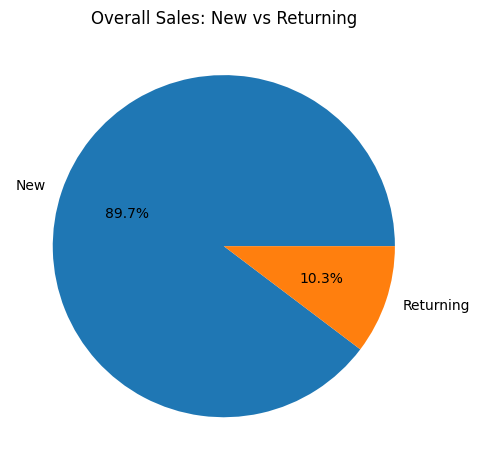


2022 Sales by Customer Type:
 is_returning
New          822776.0
Returning    271355.0
Name: amount, dtype: float64


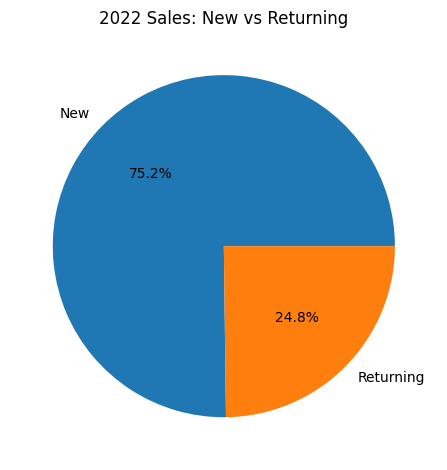


Reorder Trend:
 order_id
1     6893
2     2645
3     1320
4      735
5      457
6      286
7      200
8      151
9      115
10     102
11      73
12      53
13      46
14      35
15      30
16      29
17      29
18       8
19      13
20      13
21      11
22       6
23       3
24       1
25       2
26       3
27       3
28       4
29       6
30       3
31       3
32       2
34       1
35       1
37       1
38       1
39       1
40       2
41       1
43       1
45       1
49       1
50       1
52       1
71       1
Name: count, dtype: int64


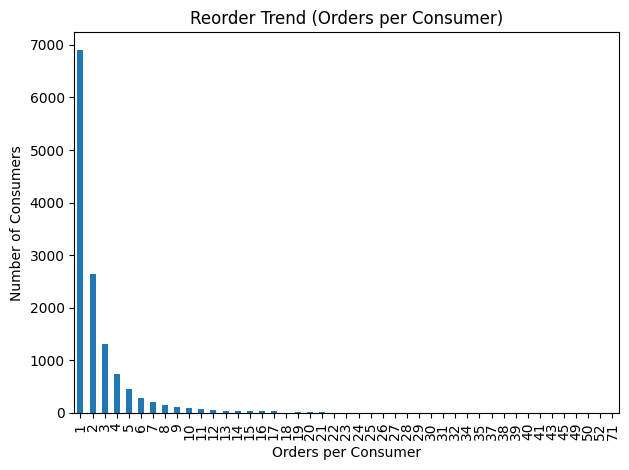

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])
# Ensure order_date is datetime
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")


# Identify each customer's first order
first_order = sales.groupby("customer_id")["order_date"].min()
sales["first_order_date"] = sales["customer_id"].map(first_order)

# Tag new vs returning
sales["is_returning"] = sales["order_date"] > sales["first_order_date"]

# --- Overall Sales Split ---
summary = sales.groupby("is_returning")["amount"].sum()
summary.index = summary.index.map({True: "Returning", False: "New"})
print("Overall Sales by Customer Type:\n", summary)

summary.plot(kind="pie", autopct="%1.1f%%", title="Overall Sales: New vs Returning")
plt.ylabel("")
plt.tight_layout()
plt.savefig("new_vs_returning_overall.png")
plt.show()

# --- 2022 Sales Split ---
sales_2022 = sales[sales["order_date"].dt.year == 2022].copy()
first_22 = sales_2022.groupby("customer_id")["order_date"].min()
sales_2022["first_order_date"] = sales_2022["customer_id"].map(first_22)
sales_2022["is_returning"] = sales_2022["order_date"] > sales_2022["first_order_date"]

summary_22 = sales_2022.groupby("is_returning")["amount"].sum()
summary_22.index = summary_22.index.map({True: "Returning", False: "New"})
print("\n2022 Sales by Customer Type:\n", summary_22)

summary_22.plot(kind="pie", autopct="%1.1f%%", title="2022 Sales: New vs Returning")
plt.ylabel("")
plt.tight_layout()
plt.savefig("new_vs_returning_2022.png")
plt.show()

# --- Reorder Trend (Orders per Consumer) ---
orders_per_customer = sales.groupby("customer_id")["order_id"].nunique()
trend = orders_per_customer.value_counts().sort_index()
print("\nReorder Trend:\n", trend)

trend.plot(kind="bar", title="Reorder Trend (Orders per Consumer)",
           ylabel="Number of Consumers", xlabel="Orders per Consumer")
plt.tight_layout()
plt.savefig("reorder_trend.png")
plt.show()


In [ ]:
# Orders per customer
orders_per_customer = sales.groupby("customer_id")["order_id"].nunique()

# Buckets: 1 to 9, then 10+
buckets = list(range(1, 10)) + [10]
labels = [str(i) if i == 1 else f"{i} and more" for i in buckets]

# Build table
freq_table = pd.DataFrame(index=labels)

num_consumers = []
perc_consumers = []
avg_days_between_orders = []

# Precompute average gap per customer
sales_sorted = sales.sort_values(["customer_id", "order_date"])
sales_sorted["days_diff"] = sales_sorted.groupby("customer_id")["order_date"].diff().dt.days
avg_gap_per_customer = sales_sorted.groupby("customer_id")["days_diff"].mean()

total_customers = len(orders_per_customer)

for i in buckets:
    if i < 10:
        custs = orders_per_customer[orders_per_customer >= i].index
    else:  # 10 and more
        custs = orders_per_customer[orders_per_customer >= 10].index

    num_consumers.append(len(custs))
    perc_consumers.append(round(len(custs) / total_customers * 100, 2))
    avg_days_between_orders.append(round(avg_gap_per_customer.loc[custs].mean(), 1))

freq_table["Number of Consumers"] = num_consumers
freq_table["% of Total Consumers"] = perc_consumers
freq_table["Avg Days Between Orders"] = avg_days_between_orders

print(freq_table)


             Number of Consumers  % of Total Consumers  \
1                          13294                100.00   
2 and more                  6401                 48.15   
3 and more                  3756                 28.25   
4 and more                  2436                 18.32   
5 and more                  1701                 12.80   
6 and more                  1244                  9.36   
7 and more                   958                  7.21   
8 and more                   758                  5.70   
9 and more                   607                  4.57   
10 and more                  492                  3.70   

             Avg Days Between Orders  
1                              140.6  
2 and more                     140.6  
3 and more                     136.5  
4 and more                     132.8  
5 and more                     127.0  
6 and more                     119.4  
7 and more                     114.6  
8 and more                     114.0  
9 and more

# **AOV TABLE**

AOV vs Order Frequency Table:
                          1            1+            2+            3+
Total Sales   8.470584e+06  8.470584e+06  6.824575e+06  5.551811e+06
Total Orders  3.414400e+04  3.414400e+04  2.725100e+04  2.196100e+04
Avg Units     2.196784e+00  2.196784e+00  2.202818e+00  2.216839e+00
AOV           2.480841e+02  2.480841e+02  2.504339e+02  2.528032e+02
Units/Order   2.196784e+00  2.196784e+00  2.202818e+00  2.216839e+00


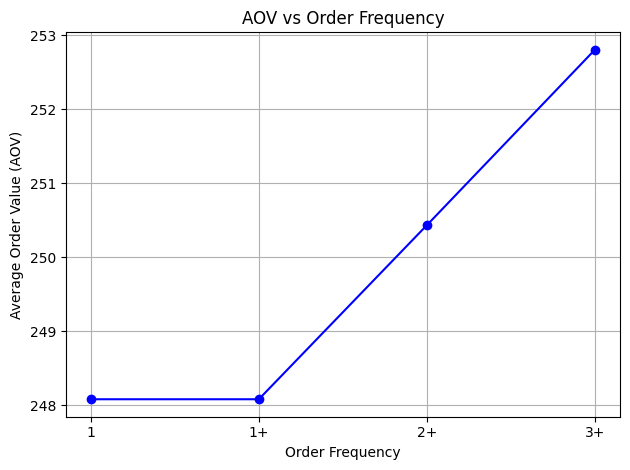

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])

# Step 1: Calculate orders per customer
order_count = sales.groupby("customer_id")["order_id"].nunique()
sales["order_count"] = sales["customer_id"].map(order_count)

# Step 2: Frequency buckets (1, 1+, 2+, 3+)
freq_buckets = [1, 1, 2, 3]
bucket_labels = ["1", "1+", "2+", "3+"]

results = {}
for freq, label in zip(freq_buckets, bucket_labels):
    subset = sales[sales["order_count"] >= freq]  # Customers with freq+ orders

    total_sales = subset["amount"].sum()
    total_orders = subset["order_id"].nunique()
    avg_units = subset["units"].mean()
    aov = total_sales / total_orders if total_orders > 0 else 0
    units_per_order = subset["units"].sum() / total_orders if total_orders > 0 else 0

    results[label] = [total_sales, total_orders, avg_units, aov, units_per_order]

# Step 3: Convert to DataFrame
aov_table = pd.DataFrame(results, index=["Total Sales", "Total Orders", "Avg Units", "AOV", "Units/Order"])
print("AOV vs Order Frequency Table:\n", aov_table)

# Step 4: Plot AOV Trend
aov_values = [results[label][3] for label in bucket_labels]  # AOV values
plt.plot(bucket_labels, aov_values, marker='o', color='blue')
plt.title("AOV vs Order Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("Average Order Value (AOV)")
plt.grid(True)
plt.tight_layout()
plt.savefig("aov_vs_frequency.png")
plt.show()


In [ ]:
O


 **AOV 2022**

AOV vs Order Frequency (2022):
                          1            1+            2+            3+
Total Sales   5.110829e+06  5.110829e+06  3.662538e+06  2.704364e+06
Total Orders  2.043400e+04  2.043400e+04  1.445600e+04  1.055600e+04
Avg Units     2.201233e+00  2.201233e+00  2.212299e+00  2.217696e+00
AOV           2.501140e+02  2.501140e+02  2.533577e+02  2.561921e+02
Units/Order   2.201233e+00  2.201233e+00  2.212299e+00  2.217696e+00


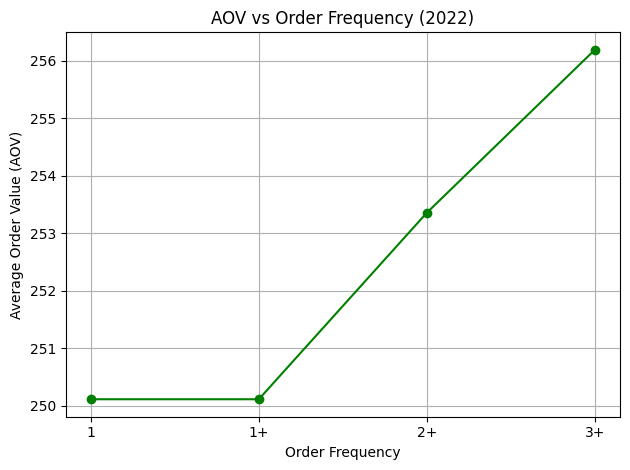

Correlation between Order Frequency & AOV in 2022: 0.6754772391235794


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
sales = pd.read_csv("sales_clean.csv")

# Ensure order_date is datetime with UTC to handle mixed time zones
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce", utc=True)

# Drop rows with invalid dates
sales = sales.dropna(subset=["order_date"])

# Filter only 2022 data
sales_2022 = sales[sales["order_date"].dt.year == 2022].copy()

# Count orders per customer (2022)
order_count_22 = sales_2022.groupby("customer_id")["order_id"].nunique()
sales_2022["order_count"] = sales_2022["customer_id"].map(order_count_22)

# Define frequency buckets
freq_buckets = [1, 1, 2, 3]
bucket_labels = ["1", "1+", "2+", "3+"]

results_22 = {}
for freq, label in zip(freq_buckets, bucket_labels):
    subset = sales_2022[sales_2022["order_count"] >= freq]

    total_sales = subset["amount"].sum()
    total_orders = subset["order_id"].nunique()
    avg_units = subset["units"].mean()
    aov = total_sales / total_orders if total_orders > 0 else 0
    units_per_order = subset["units"].sum() / total_orders if total_orders > 0 else 0

    results_22[label] = [total_sales, total_orders, avg_units, aov, units_per_order]

# Convert to DataFrame
aov_table_22 = pd.DataFrame(results_22, index=["Total Sales", "Total Orders", "Avg Units", "AOV", "Units/Order"])
print("AOV vs Order Frequency (2022):\n", aov_table_22)

# Plot for 2022
aov_values_22 = [results_22[label][3] for label in bucket_labels]
plt.plot(bucket_labels, aov_values_22, marker='o', color='green')
plt.title("AOV vs Order Frequency (2022)")
plt.xlabel("Order Frequency")
plt.ylabel("Average Order Value (AOV)")
plt.grid(True)
plt.tight_layout()
plt.savefig("aov_vs_frequency_2022.png")
plt.show()

# Correlation in 2022
correlation_22 = sales_2022.groupby("customer_id")[["order_count", "amount"]].sum()
correlation_value = correlation_22["order_count"].corr(correlation_22["amount"])
print("Correlation between Order Frequency & AOV in 2022:", correlation_value)





# **PRODUCT SUMMARY**

In [ ]:
import pandas as pd

# Load cleaned data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])

# Ensure order_date is datetime
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce", utc=True)

# -------------------------
# 1. Complete Data Summary
# -------------------------
complete_summary = sales.groupby("product").agg(
    Units=("units", "sum"),
    Net_Sales=("amount", "sum")
)
complete_summary["% of Total Sales"] = (complete_summary["Net_Sales"] / complete_summary["Net_Sales"].sum()) * 100

# -------------------------
# 2. 2022 Data Summary
# -------------------------
sales_2022 = sales[sales["order_date"].dt.year == 2022]
summary_2022 = sales_2022.groupby("product").agg(
    Units=("units", "sum"),
    Net_Sales=("amount", "sum")
)
summary_2022["% of Total Sales"] = (summary_2022["Net_Sales"] / summary_2022["Net_Sales"].sum()) * 100

# -------------------------
# 3. Combine Results
# -------------------------
final_table = pd.concat(
    {"Complete Data": complete_summary, "2022 Data": summary_2022},
    axis=1
)

# Sort by Net Sales (Complete Data) descending
final_table = final_table.sort_values(("Complete Data", "Net_Sales"), ascending=False)

# Show table
print(final_table.round(2))


                                Complete Data                               \
                                        Units   Net_Sales % of Total Sales   
product                                                                      
Revitalizing Eye Cream                  14242  1612632.73            19.04   
Skin Renewal Treatment                  11780  1344380.75            15.87   
Moisture Boost Facial Cream              9784  1104866.00            13.04   
Neck Revitalizing Serum                  7852   887499.50            10.48   
Acne Clearing Cream                      7218   798566.00             9.43   
Neck Firming Cream                       5822   665551.00             7.86   
Gentle Skin Cleansing Gel                5005   563084.00             6.65   
Overnight Renewal Cream                  3402   386867.50             4.57   
Daytime Nourishing Cream                 3072   349678.00             4.13   
Intensive Hand Cream                     2417   273226.00       

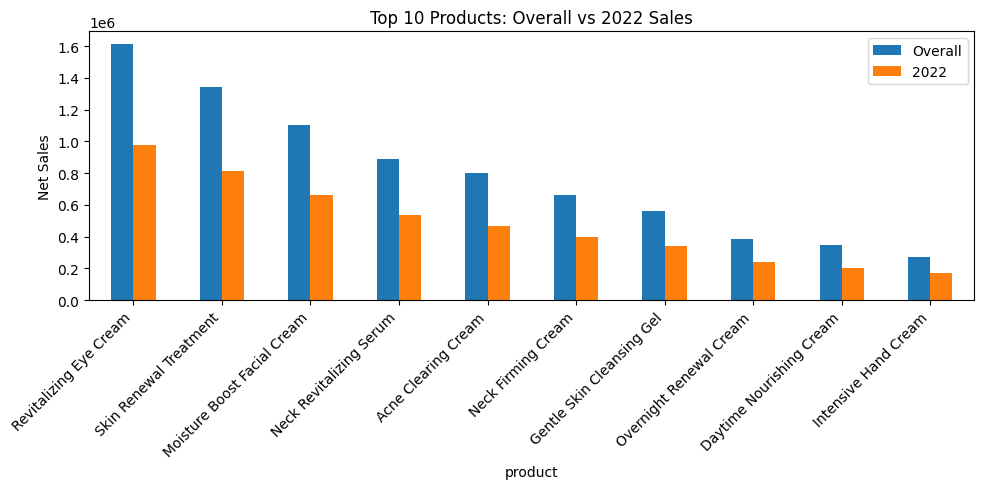

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce", utc=True)

# Overall summary
overall = sales.groupby("product")["amount"].sum()

# 2022 summary
sales_2022 = sales[sales["order_date"].dt.year == 2022]
summary_2022 = sales_2022.groupby("product")["amount"].sum()

# Combine into one DataFrame
combined = pd.DataFrame({
    "Overall": overall,
    "2022": summary_2022
}).fillna(0)

# Take Top 10 products by overall sales
top_products = combined.sort_values("Overall", ascending=False).head(10)

# Plot side-by-side bars
top_products.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products: Overall vs 2022 Sales")
plt.ylabel("Net Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


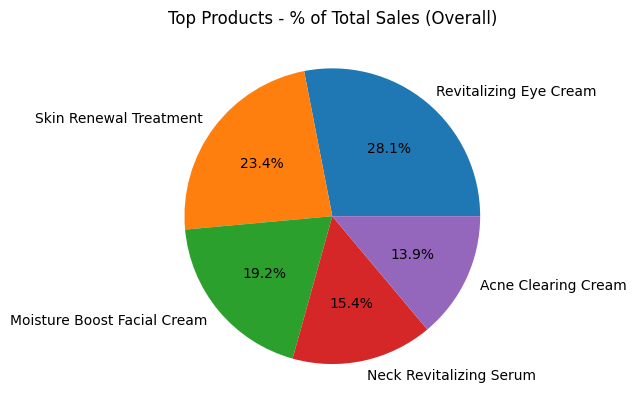

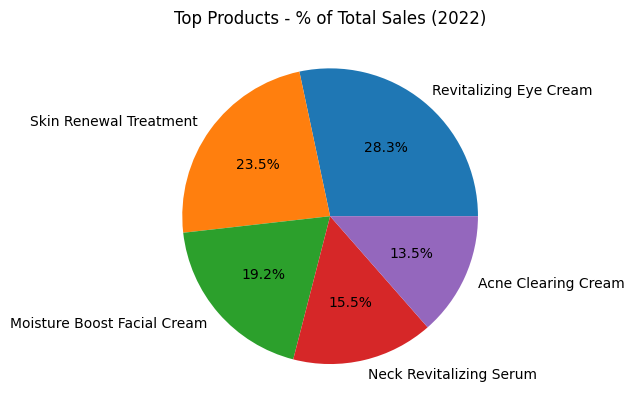

In [ ]:
# Overall % Pie Chart
overall_percent = (overall / overall.sum()) * 100
overall_percent.sort_values(ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', title="Top Products - % of Total Sales (Overall)"
)
plt.ylabel("")
plt.show()

# 2022 % Pie Chart
percent_2022 = (summary_2022 / summary_2022.sum()) * 100
percent_2022.sort_values(ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', title="Top Products - % of Total Sales (2022)"
)
plt.ylabel("")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn5  # for Venn diagram

# Load data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])

# 1. Top 5 Products by Units Sold
top5_products = sales.groupby("product")["units"].sum().sort_values(ascending=False).head(5)
top5_list = top5_products.index.tolist()
print("Top 5 Products:\n", top5_products)

# Bar chart for top 5 products
top5_products.plot(kind="bar", color="teal", title="Top 5 Products by Units Sold")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top5_products_units.png")
plt.show()

# 2. Consumers who bought all 5 products
customers_all5 = set(sales[sales["product"] == top5_list[0]]["customer_id"])
for prod in top5_list[1:]:
    customers_all5 = customers_all5 & set(sales[sales["product"] == prod]["customer_id"])
print("Consumers who bought all 5 products:", len(customers_all5))

# 3. Orders by these consumers
orders_all5 = sales[sales["customer_id"].isin(customers_all5)]["order_id"].nunique()
print("Number of orders by consumers who bought all 5 products:", orders_all5)

# 4. Reorder Trend (customers who bought product more than once)
product_reorders = sales.groupby(["product", "customer_id"])["order_id"].nunique()
reorders_count = product_reorders[product_reorders > 1].groupby("product").count()
reorders_count = reorders_count.sort_values(ascending=False)
print("Product Reorders Count:\n", reorders_count)

# Bar chart for reorders
reorders_count.plot(kind="bar", color="orange", title="Product Reorders by Consumers")
plt.ylabel("Number of Repeat Buyers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("product_reorders.png")
plt.show()

# 5. Product with most repeat buyers
most_repeat_product = reorders_count.head(1)
print("Product repurchased by most consumers:\n", most_repeat_product)

# 6. Venn Diagram for consumer overlap (if <= 5 products)
if len(top5_list) == 5:
    sets = [set(sales[sales["product"] == prod]["customer_id"]) for prod in top5_list]
    venn5(subsets=sets, set_labels=top5_list)
    plt.title("Consumers Overlap for Top 5 Products")
    plt.savefig("venn_top5.png")
    plt.show()

ImportError: cannot import name 'venn5' from 'matplotlib_venn' (/usr/local/lib/python3.12/dist-packages/matplotlib_venn/__init__.py)

In [ ]:
top5_products = sales.groupby("product")["units"].sum().sort_values(ascending=False).head(5)
print("Top 5 Products:\n", top5_products)


Top 5 Products:
 product
Revitalizing Eye Cream         14242
Skin Renewal Treatment         11780
Moisture Boost Facial Cream     9784
Neck Revitalizing Serum         7852
Acne Clearing Cream             7218
Name: units, dtype: int64


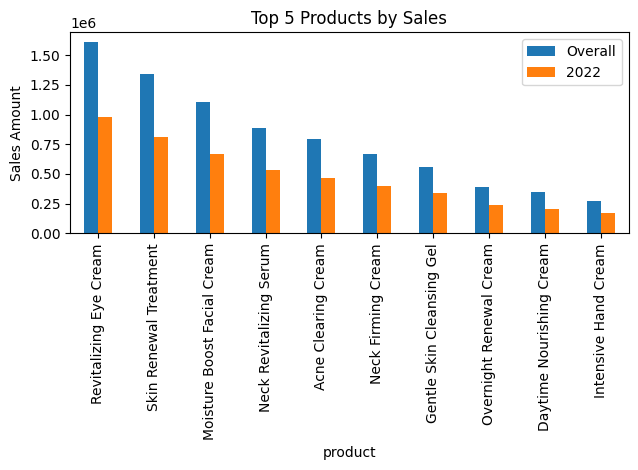

In [ ]:
import matplotlib.pyplot as plt

# Top Products Chart
top_products.plot(kind="bar", title="Top 5 Products by Sales", ylabel="Sales Amount")
plt.tight_layout()
plt.show()


In [ ]:
summary = sales.groupby("is_returning")["amount"].sum()
summary.index = summary.index.map({True: "Returning", False: "New"})

# Pie Chart
summary.plot(kind="pie", autopct="%1.1f%%", title="Sales Share: New vs Returning Customers")
plt.ylabel("")   # removes the default y-label
plt.tight_layout()
plt.show()

KeyError: 'is_returning'

In [ ]:
# Top 5 States by Sales
region_sales = df.groupby("state")["amount"].sum().sort_values(ascending=False).head(5)

region_sales.plot(kind="bar", title="Top 5 States by Sales", ylabel="Sales Amount", color="orange")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [ ]:
!pip install matplotlib-venn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn5  # for Venn diagram

# Load data
sales = pd.read_csv("sales_clean.csv", parse_dates=["order_date"])

# 1. Top 5 Products by Units Sold
top5_products = sales.groupby("product")["units"].sum().sort_values(ascending=False).head(5)
top5_list = top5_products.index.tolist()
print("Top 5 Products:\n", top5_products)

# Bar chart for top 5 products
top5_products.plot(kind="bar", color="teal", title="Top 5 Products by Units Sold")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top5_products_units.png")
plt.show()

# 2. Consumers who bought all 5 products
customers_all5 = set(sales[sales["product"] == top5_list[0]]["customer_id"])
for prod in top5_list[1:]:
    customers_all5 = customers_all5 & set(sales[sales["product"] == prod]["customer_id"])
print("Consumers who bought all 5 products:", len(customers_all5))

# 3. Orders by these consumers
orders_all5 = sales[sales["customer_id"].isin(customers_all5)]["order_id"].nunique()
print("Number of orders by consumers who bought all 5 products:", orders_all5)

# 4. Reorder Trend (customers who bought product more than once)
product_reorders = sales.groupby(["product", "customer_id"])["order_id"].nunique()
reorders_count = product_reorders[product_reorders > 1].groupby("product").count()
reorders_count = reorders_count.sort_values(ascending=False)
print("Product Reorders Count:\n", reorders_count)

# Bar chart for reorders
reorders_count.plot(kind="bar", color="orange", title="Product Reorders by Consumers")
plt.ylabel("Number of Repeat Buyers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("product_reorders.png")
plt.show()

# 5. Product with most repeat buyers
most_repeat_product = reorders_count.head(1)
print("Product repurchased by most consumers:\n", most_repeat_product)

# 6. Venn Diagram for consumer overlap (if <= 5 products)
if len(top5_list) == 5:
    sets = [set(sales[sales["product"] == prod]["customer_id"]) for prod in top5_list]
    venn5(subsets=sets, set_labels=top5_list)
    plt.title("Consumers Overlap for Top 5 Products")
    plt.savefig("venn_top5.png")
    plt.show()